In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [5]:
df.shape

(1061, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [7]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [8]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [9]:
df["selling_price"].unique()

array([175000,  45000, 150000,  65000,  20000,  18000,  78500, 180000,
        30000,  50000,  35000,  28000,  80000, 365000, 185000,  25000,
        40000, 120000,  15000,  26000,  32000, 110000,  42000,  21000,
        55000,  38000,  43000,  62000,  60000,  90000, 125000,  85000,
        29900,  70000,  48000,  34000, 165000,  29500,  95000,   7500,
       160000, 140000,  22000,  22989,  24999,  75000,  17500,  57000,
        83900, 135000, 299000, 750000, 190000, 130000,  54786,  72000,
       100000, 138000, 170000, 123000,  23000,  41000,  47999,  36999,
        12000,  27000,  10000,  56000,  58000,  87000, 145000,   9000,
        14000,  17000, 210000,  54000, 260000,  98000, 200000, 195000,
       270000, 425000, 760000,  37000, 330000, 162000, 285000,  69000,
       300000,  26500,  78000,   8000,  39000,  36000,  16000,  83299,
        14700,  19000,  14900,  24000,  24700,  52000,  47000, 105000,
       115000,   5000,  86000,  28700,   6000,  23500,  68000,  20100,
      

1)What is the range of selling prices in the dataset?

In [10]:
df["selling_price"] = pd.to_numeric(df["selling_price"] , errors = "coerce")

min_price = df["selling_price"].min()
max_price = df["selling_price"].max()

print("Range of selling price of Bike:" , max_price - min_price)

Range of selling price of Bike: 755000


2)What is the median selling price for bikes in the dataset?

In [11]:
print("Median selling price of Bike:" , df["selling_price"].median())

Median selling price of Bike: 45000.0


In [12]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

3)What is the most common seller type?

In [13]:
df["seller_type"].unique()

array(['Individual', 'Dealer'], dtype=object)

In [14]:
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [15]:
print("The Most Common seller type is Individual")

The Most Common seller type is Individual


In [16]:
top_seller_type = df["seller_type"].mode()[0]
print("Most Common Seller Type:", top_seller_type)

Most Common Seller Type: Individual


In [17]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

4) How many bikes have driven more than 50,000 kilometers?

In [18]:
high_mileage_count = (df["km_driven"] > 50000).sum()
print("Bikes driven more than 50,000 km:", high_mileage_count)

Bikes driven more than 50,000 km: 170


5) What is the average km_driven value for each ownership type?

In [19]:
df["owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [20]:
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6)What proportion of bikes are from the year 2015 or older?

In [21]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [22]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")

In [23]:
df["year"]

0       2019
1       2017
2       2018
3       2015
4       2011
        ... 
1056    2010
1057    2012
1058    2013
1059    2009
1060    2008
Name: year, Length: 1061, dtype: int64

In [24]:
bikes_count = (df["year"] <= 2015).mean()
print("Proportion of bikes from 2015 or older:", bikes_count*100)

Proportion of bikes from 2015 or older: 56.64467483506126


7)What is the trend of missing values across the dataset?

In [25]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [26]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [27]:
null_summary = df.isnull().sum()
null_percentage = (df.isnull().mean() * 100).round(2)
print("Absolute Missing Values:\n", null_summary)
print("\nPercentage Missing Values:\n", null_percentage)

Absolute Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage Missing Values:
 name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


8)What is the highest ex_showroom_price recorded, and for which bike?

In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [29]:
df["ex_showroom_price"].unique()

array([     nan,  148114.,   89643.,   53857.,   87719.,   60122.,
         78712.,   47255.,   95955.,  351680.,   58314.,  117926.,
        132680.,   44389.,   53900.,   56147.,   84751.,   61600.,
         79432.,   78350.,   71049.,   57557.,  202310.,   71150.,
         56750.,   84042.,   69750.,   59844.,   42859.,   73413.,
         49900.,   59422.,   57549.,   51994.,   80350.,   54605.,
         88161.,   78513.,   50098.,  195500.,   92074.,  164004.,
         74295.,   49642.,   51112.,   53751.,   50267.,   61653.,
         70851.,   53079.,  133680.,  181445.,   65626.,   58438.,
         61118.,   75936.,  180525.,   87543.,   80435.,   85011.,
       1278000.,  155740.,  202127.,   86744.,  156304.,   84246.,
         49521.,   64589.,   69983.,   54299.,   72303.,   65800.,
         58757.,   47032.,   79233.,  118997.,   52949.,   64071.,
         61545.,  168482.,  163331.,   59095.,   75502.,   52271.,
         63331.,   52372.,   58630.,   94703.,   53436.,   591

In [30]:
df["ex_showroom_price"] = pd.to_numeric(df["ex_showroom_price"], errors="coerce")
df["ex_showroom_price"] = df["ex_showroom_price"].fillna(0)

In [31]:
max_price = df["ex_showroom_price"].max()

In [32]:
top_bike = df[df["ex_showroom_price"] == max_price]
print("Highest Ex-Showroom Price:", max_price)
print()
print("\nBike(s) with this price:\n", top_bike)

Highest Ex-Showroom Price: 1278000.0


Bike(s) with this price:
                            name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


9)What is the total number of bikes listed by each seller type?

In [33]:
seller_counts = df["seller_type"].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10 )What is the relationship between selling_price and km_driven for first-owner bikes?

In [34]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [35]:
df["owner"].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [36]:
df["selling_price"] = pd.to_numeric(df["selling_price"] , errors = "coerce")
df["km_driven"] = pd.to_numeric(df["km_driven"] , errors = "coerce")

first_owner_df = df[df["owner"] == "1st owner"]


In [37]:
correlation = first_owner_df["selling_price"].corr(first_owner_df["km_driven"])
print("Correlation between selling_price and km_driven (First Owner):", correlation)

Correlation between selling_price and km_driven (First Owner): -0.24348174844965703


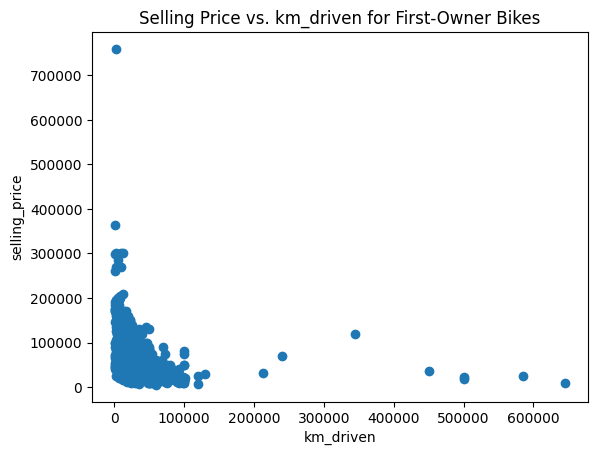

In [38]:
plt.scatter(first_owner_df["km_driven"], first_owner_df["selling_price"])
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.title("Selling Price vs. km_driven for First-Owner Bikes")
plt.show()

11)Identify and remove outliers in the km_driven column using the IQR method?

In [39]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [40]:
df["km_driven"].value_counts()

km_driven
20000     39
40000     38
50000     37
25000     31
30000     28
          ..
33200      1
646000     1
3909       1
7672       1
92233      1
Name: count, Length: 304, dtype: int64

In [41]:
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -30750.0
Upper Bound: 87250.0


In [42]:
outliers = df[(df["km_driven"] < lower_bound) | (df["km_driven"] > upper_bound)]
print("\nIdentified Outliers:\n", outliers)


Identified Outliers:
                                  name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548            

In [43]:
df_remove = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]


print("\nDataset Shape Before:", df.shape)
print("Dataset Shape After Outlier Removal:", df_remove.shape)


Dataset Shape Before: (1061, 7)
Dataset Shape After Outlier Removal: (1022, 7)


12)Perform a bivariate analysis to visualize the relationship between year and selling_price.

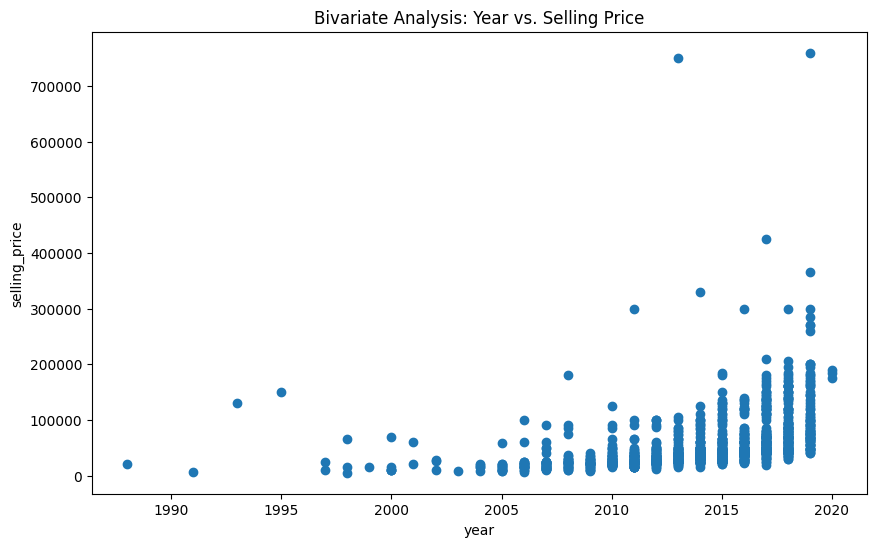

In [44]:
plt.figure(figsize = (10,6))
plt.scatter(df["year"] , df["selling_price"])
plt.xlabel("year")
plt.ylabel("selling_price")
plt.title("Bivariate Analysis: Year vs. Selling Price")
plt.show()

13)What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [45]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [46]:
current_age = 2025
df["bike_age"] = current_age - df["year"]
df["bike_age"]

0        6
1        8
2        7
3       10
4       14
        ..
1056    15
1057    13
1058    12
1059    16
1060    17
Name: bike_age, Length: 1061, dtype: int64

In [47]:
df["depreciation"] = df["ex_showroom_price"] - df["selling_price"]
df["depreciation"]

0      -175000.0
1       -45000.0
2        -1886.0
3        24643.0
4       -20000.0
          ...   
1056     35000.0
1057     35000.0
1058     42000.0
1059     46000.0
1060     65000.0
Name: depreciation, Length: 1061, dtype: float64

In [48]:
depreciation_per_year = df.groupby("bike_age")["depreciation"].mean().reset_index()

print(depreciation_per_year)

    bike_age   depreciation
0          5 -131420.000000
1          6  -56017.197674
2          7  -28375.748092
3          8  -19563.781955
4          9    5846.429907
5         10    9550.620000
6         11   12224.945055
7         12   18152.123288
8         13    1319.328571
9         14    9727.688525
10        15    4474.166667
11        16    8167.464286
12        17  -15638.321429
13        18  -10986.413793
14        19  -13147.100000
15        20  -13060.571429
16        21   -4129.600000
17        22   -8000.000000
18        23  -20666.666667
19        24  -12574.000000
20        25  -20833.333333
21        26  -15000.000000
22        27  -28333.333333
23        28  -17500.000000
24        30 -150000.000000
25        32 -130000.000000
26        34   -6000.000000
27        37  -20000.000000


In [49]:
yearly_avg_price = df.groupby("year")["selling_price"].transform("mean")
threshold = 1.2 * yearly_avg_price
print(threshold)

0       143627.413953
1        94673.684211
2       105192.448855
3        67800.000000
4        42786.865574
            ...      
1056     38152.000000
1057     42898.080000
1058     61364.383562
1059     26721.428571
1060     41147.142857
Name: selling_price, Length: 1061, dtype: float64


In [50]:
premium_bikes = df[df["selling_price"] > threshold][["name", "year", "selling_price"]]

print(premium_bikes)

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
17                        Yamaha YZF R15 S  2010          40000
...                                    ...   ...            ...
984              Royal Enfield Classic 500  2014          95000
985              Royal Enfield Classic 500  2011          90000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1023                Bajaj Avenger 220 dtsi  2012          45000

[233 rows x 3 columns]


15)Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [51]:
numeric_cols = ["year", "selling_price", "km_driven", "ex_showroom_price"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [52]:
corr_matrix = df[numeric_cols].corr()

                       year  selling_price  km_driven  ex_showroom_price
year               1.000000       0.402188  -0.288675           0.208249
selling_price      0.402188       1.000000  -0.212937           0.604481
km_driven         -0.288675      -0.212937   1.000000          -0.089837
ex_showroom_price  0.208249       0.604481  -0.089837           1.000000


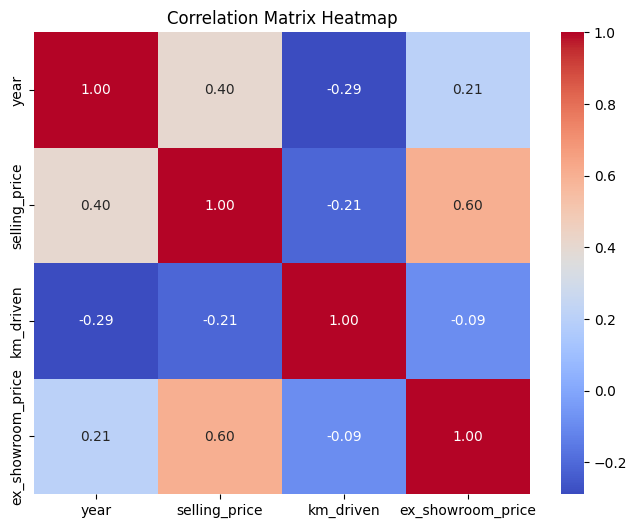

In [53]:
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Car Sale Dataset

In [54]:
df = pd.read_csv("Car Sale.csv")

In [55]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [56]:
df.shape

(23906, 16)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [58]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [59]:
avg_price_by_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending = False)

In [60]:
avg_price_by_dealer

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [61]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

2)Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [62]:
price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending  = False)

In [63]:
highest_variation_company = price_variation.idxmax()
highest_std = price_variation.max()

In [64]:
print("Company with highest price variation:", highest_variation_company)
print("Standard Deviation of Price ($):", highest_std)

Company with highest price variation: Lincoln
Standard Deviation of Price ($): 19658.050211265567


In [65]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

3)What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [66]:
transmission_stats = df.groupby("Transmission")["Price ($)"].describe()
transmission_stats

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [67]:
iqr_by_transmission = transmission_stats["75%"] - transmission_stats["25%"]
print("\nInterquartile Range (IQR) by Transmission Type:\n", iqr_by_transmission)


Interquartile Range (IQR) by Transmission Type:
 Transmission
Auto      16500.0
Manual    17000.0
dtype: float64


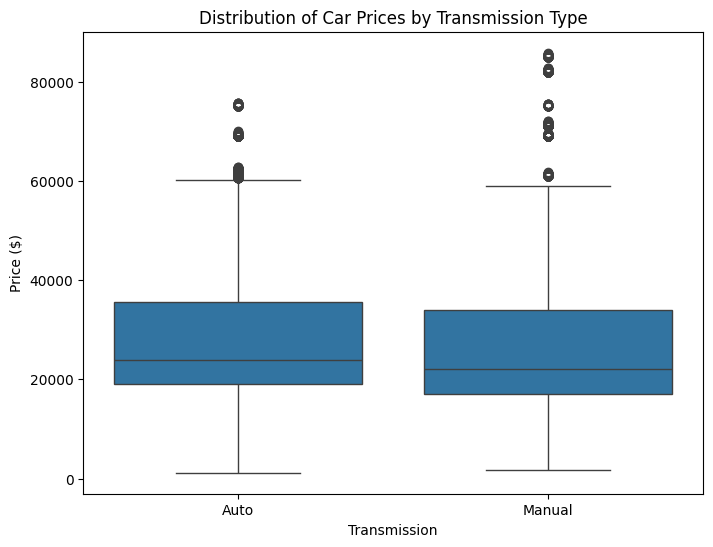

In [68]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Distribution of Car Prices by Transmission Type")
plt.ylabel("Price ($)")
plt.show()

In [69]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

4)What is the distribution of car prices across different regions?

In [70]:
region_stats = df.groupby("Dealer_Region")["Price ($)"].describe()
region_stats

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


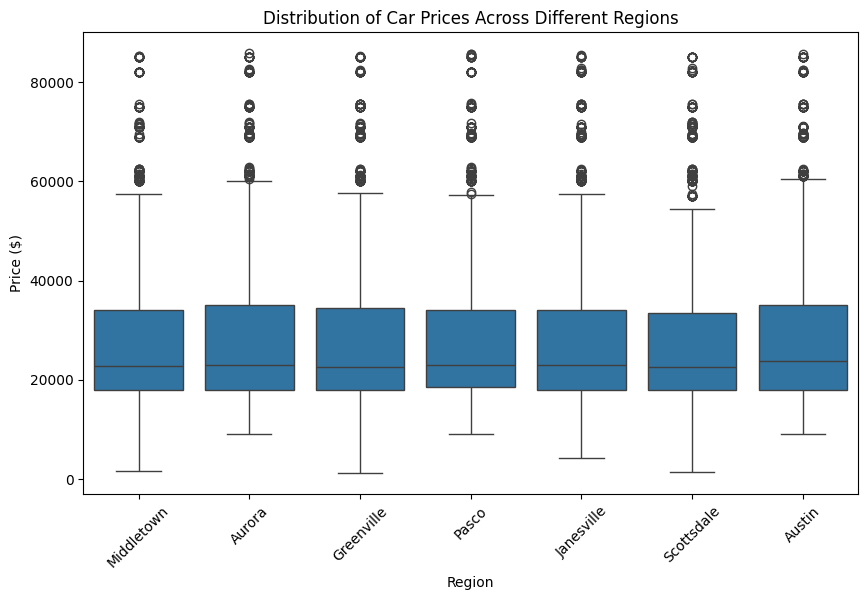

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Distribution of Car Prices Across Different Regions")
plt.ylabel("Price ($)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [72]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

5)What is the distribution of cars based on body styles?

In [73]:
body_styles_counts = df["Body Style"].value_counts()
body_styles_counts

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

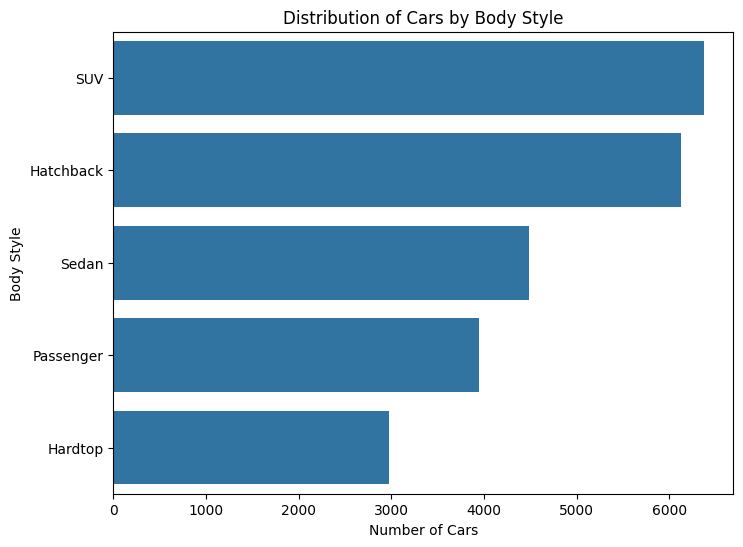

In [74]:
plt.figure(figsize=(8,6))
sns.countplot(y="Body Style", data=df, order=body_styles_counts.index)
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Number of Cars")
plt.ylabel("Body Style")
plt.show()

In [75]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

6)How does the average selling price of cars vary by customer gender and annual income?

In [76]:
income_bins = [0 ,50000 , 100000 , 150000 , 200000 , df["Annual Income"].max()]
income_labels = ["<50k" , "50 - 100k" , "100k - 150k" , "150 - 200k" , "200k" ]

df["Income Grp"] = pd.cut(df["Annual Income"] , bins = income_bins , labels = income_labels )

In [77]:
avg_price = df.pivot_table(values="Price ($)", index="Income Grp", columns="Gender", aggfunc="mean")
print(avg_price)

Gender             Female          Male
Income Grp                             
<50k         28132.038732  27816.302247
50 - 100k             NaN  43000.000000
100k - 150k  33000.500000  16666.666667
150 - 200k   19001.000000  23055.888889
200k         28318.788864  28106.856206


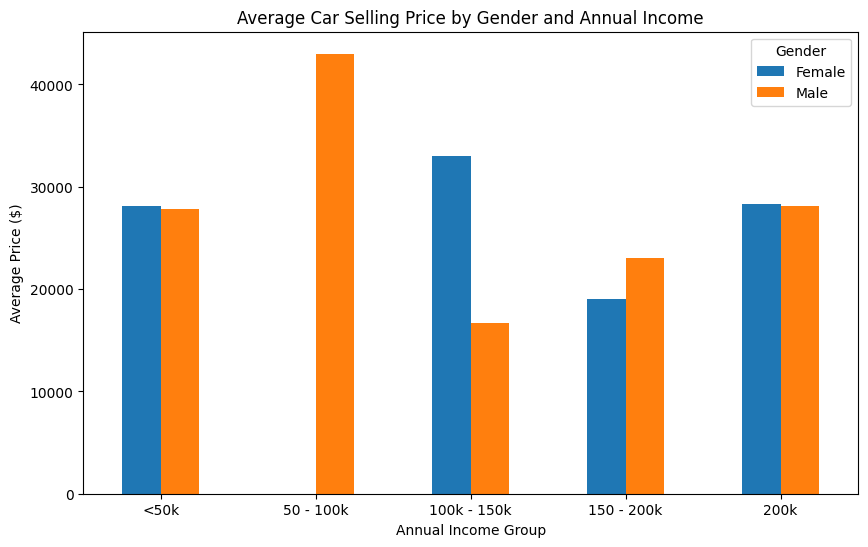

In [78]:
avg_price.plot(kind="bar", figsize=(10,6))
plt.title("Average Car Selling Price by Gender and Annual Income")
plt.ylabel("Average Price ($)")
plt.xlabel("Annual Income Group")
plt.xticks(rotation=0)
plt.show()

In [79]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Grp'],
      dtype='object')

7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

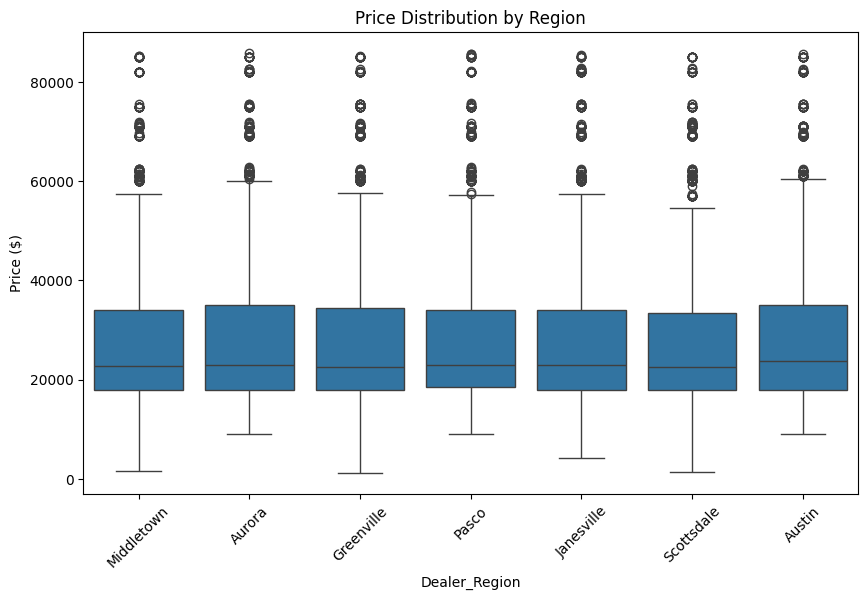

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)")
plt.title("Price Distribution by Region")
plt.xticks(rotation=45)
plt.show()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


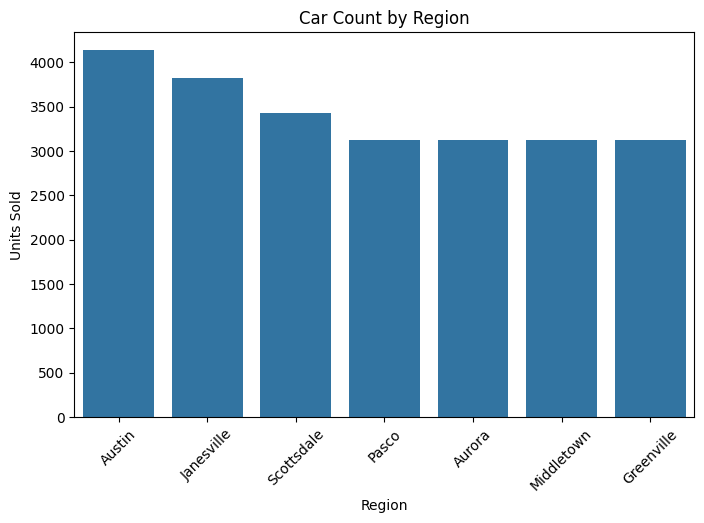

In [81]:
region_sales = df["Dealer_Region"].value_counts()
print(region_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Car Count by Region")
plt.ylabel("Units Sold")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

In [82]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Grp'],
      dtype='object')

8)How does the average car price differ between cars with different engine sizes?

In [83]:
engine_price_avg = df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)
print(engine_price_avg)

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


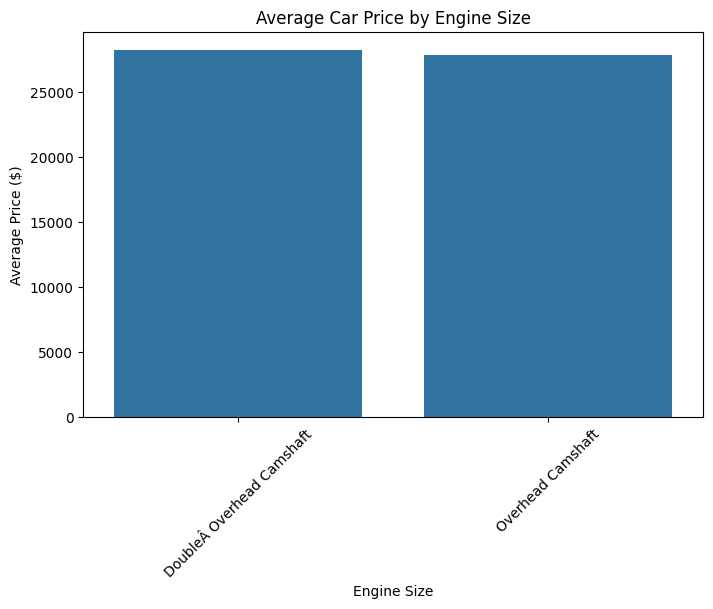

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(x=engine_price_avg.index, y=engine_price_avg.values)
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.show()

In [85]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Grp'],
      dtype='object')

9)How do car prices vary based on the customer’s annual income bracket?

In [86]:
bins = [0, 30000, 60000, 100000, 200000, df["Annual Income"].max()]
labels = ["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"]

df["Income_Bracket"] = pd.cut(df["Annual Income"], bins=bins, labels=labels, include_lowest=True)

In [87]:
income_price_avg = df.groupby("Income_Bracket")["Price ($)"].mean()
print(income_price_avg)

Income_Bracket
Low          27884.297820
Lower-Mid             NaN
Mid          43000.000000
Upper-Mid    22833.666667
High         28152.043460
Name: Price ($), dtype: float64


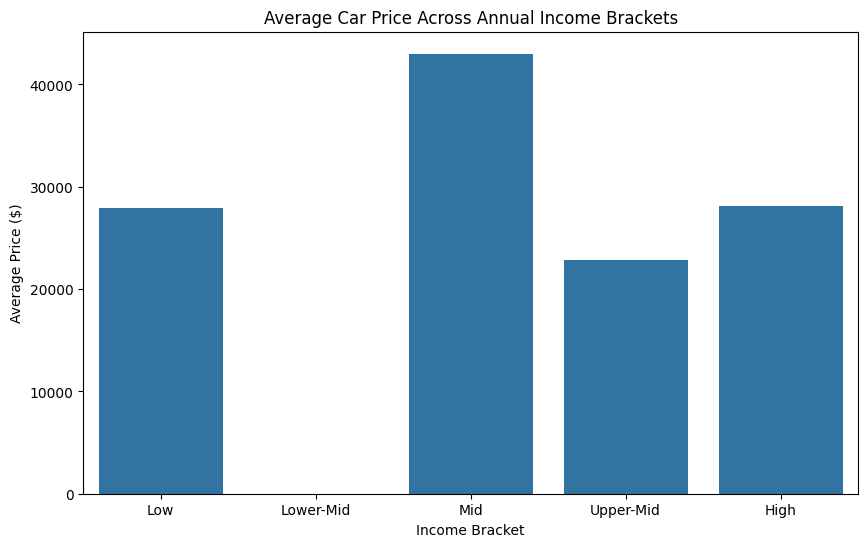

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(x=income_price_avg.index, y=income_price_avg.values)
plt.title("Average Car Price Across Annual Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Average Price ($)")
plt.show()


10)What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [89]:
top_models = df["Model"].value_counts().head(5)
print(top_models)

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


In [90]:
top_model_list = top_models.index

df_top = df[df["Model"].isin(top_model_list)]

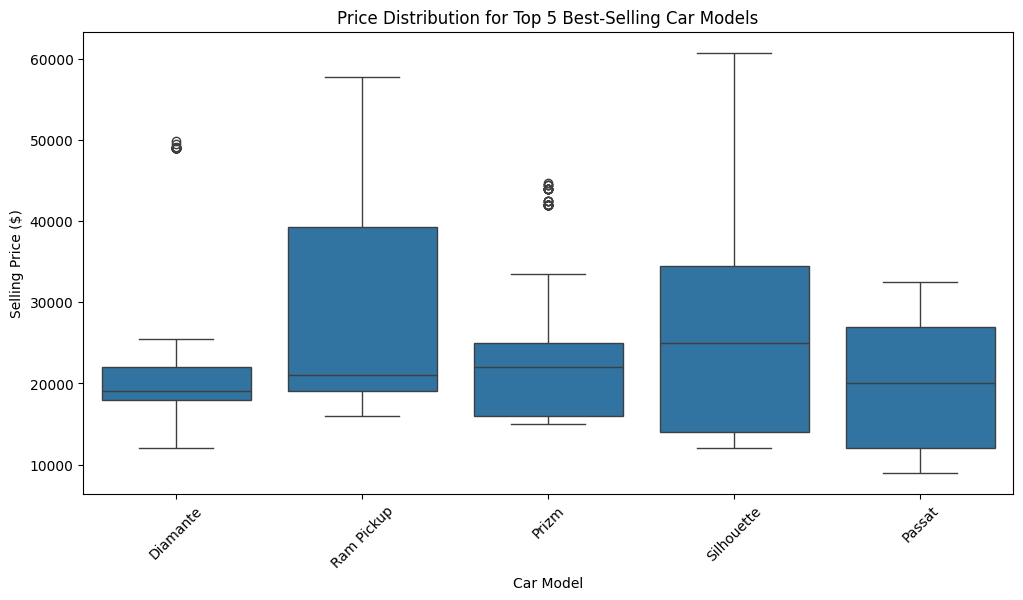

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x="Model", y="Price ($)")
plt.title("Price Distribution for Top 5 Best-Selling Car Models")
plt.xlabel("Car Model")
plt.ylabel("Selling Price ($)")
plt.xticks(rotation=45)
plt.show()

In [92]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Grp', 'Income_Bracket'],
      dtype='object')

11) How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [93]:
price_engine_color = df.groupby(["Engine", "Color"])["Price ($)"].mean().unstack()
print(price_engine_color)

Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229


In [94]:
color_variation = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)
print(color_variation)

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


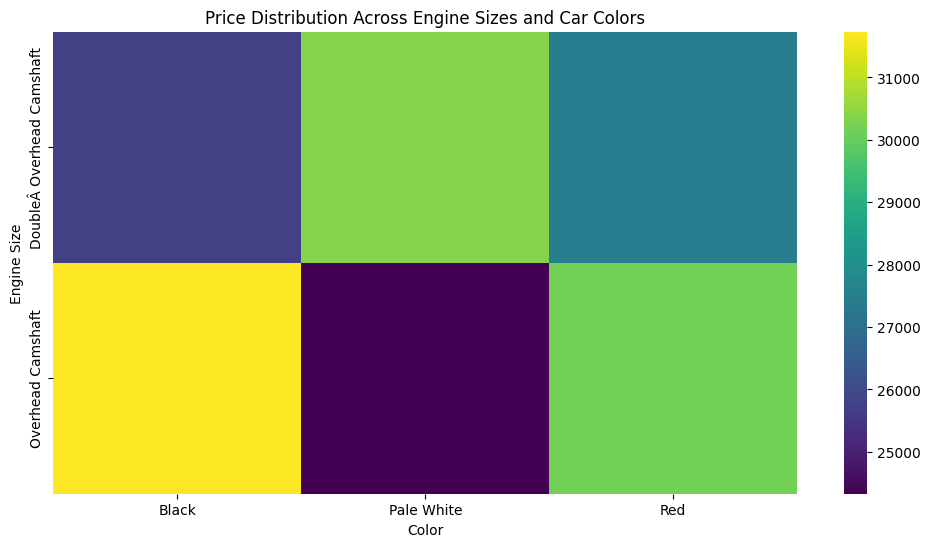

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(price_engine_color, annot=False, cmap="viridis")
plt.title("Price Distribution Across Engine Sizes and Car Colors")
plt.xlabel("Color")
plt.ylabel("Engine Size")
plt.show()

In [96]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Grp', 'Income_Bracket'],
      dtype='object')

12)Is there any seasonal trend in car sales based on the date of sale?

In [97]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter

In [98]:
monthly_sales = df.groupby("Month")["Car_id"].count()
print(monthly_sales)

Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64


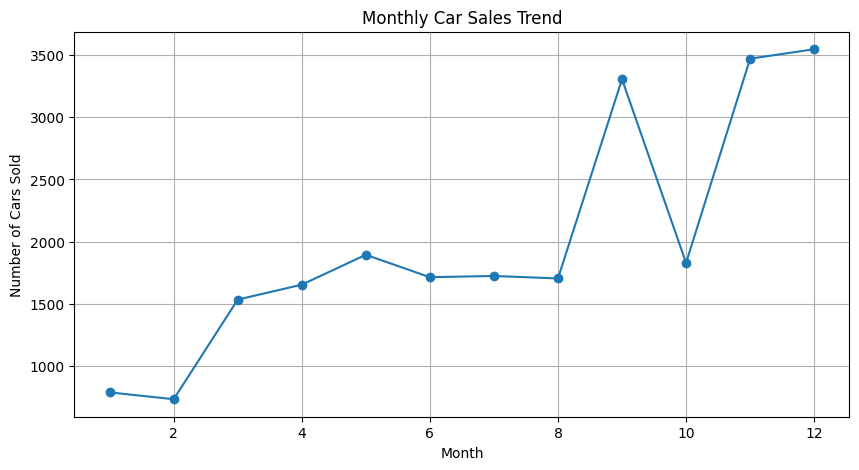

In [99]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.show()

In [100]:
quarterly_sales = df.groupby("Quarter")["Car_id"].count()
print(quarterly_sales)

Quarter
1    3060
2    5265
3    6735
4    8846
Name: Car_id, dtype: int64


13)How does the car price distribution change when considering different combinations of body style and transmission type?

In [101]:
price_pivot = df.pivot_table(
    values="Price ($)",
    index="Body Style",
    columns="Transmission",
    aggfunc=["mean", "median", "std", "min", "max"]
)

print(price_pivot)

                      mean                 median                    std  \
Transmission          Auto        Manual     Auto   Manual          Auto   
Body Style                                                                 
Hardtop       31520.188210  27016.943698  27000.0  22001.0  13687.756740   
Hatchback     25910.544824  28702.550562  21500.0  23000.0  13144.014337   
Passenger     28915.835149  28969.521039  25000.0  22000.0  13946.481932   
SUV           27501.404407  26079.019161  25000.0  22000.0  13299.927913   
Sedan         29955.294344  29664.271572  26000.0  25000.0  14310.910860   

                              min           max         
Transmission        Manual   Auto Manual   Auto Manual  
Body Style                                              
Hardtop       14072.501848  12000  11000  75501  82500  
Hatchback     16284.049616   4200   1700  75700  85600  
Passenger     18523.684163   9000  10000  69801  85800  
SUV           14621.526541   1200   2200  75501  

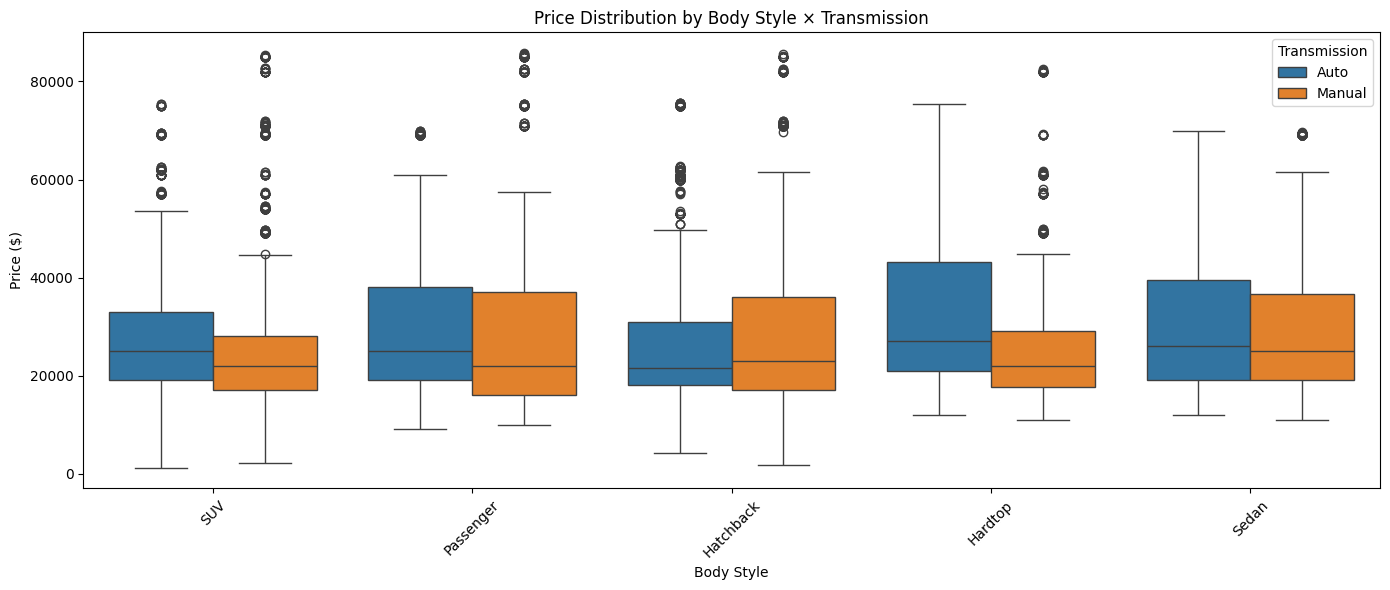

In [102]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Body Style", y="Price ($)", hue="Transmission")
plt.title("Price Distribution by Body Style × Transmission")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
combo_variation = (
    df.groupby(["Body Style", "Transmission"])["Price ($)"]
      .std()
      .sort_values(ascending=False)
)

print(combo_variation)


Body Style  Transmission
Passenger   Manual          18523.684163
Hatchback   Manual          16284.049616
Sedan       Manual          15440.056434
SUV         Manual          14621.526541
Sedan       Auto            14310.910860
Hardtop     Manual          14072.501848
Passenger   Auto            13946.481932
Hardtop     Auto            13687.756740
SUV         Auto            13299.927913
Hatchback   Auto            13144.014337
Name: Price ($), dtype: float64


14)What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [104]:

df["Engine_clean"] = (
    df["Engine"]
    .str.extract(r'(\d+)')       
    .astype(float)                
)

In [105]:
corr_matrix = df[["Price ($)", "Engine_clean", "Annual Income"]].corr()
print(corr_matrix)

               Price ($)  Engine_clean  Annual Income
Price ($)       1.000000           NaN       0.012065
Engine_clean         NaN           NaN            NaN
Annual Income   0.012065           NaN       1.000000


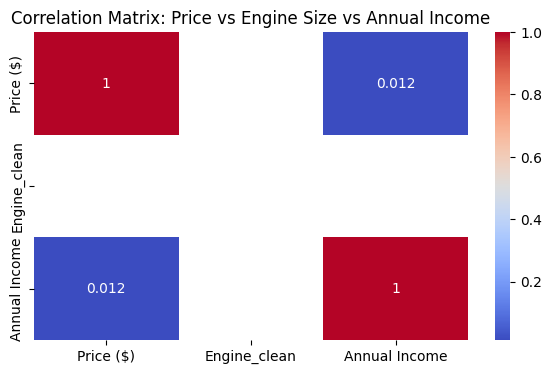

In [106]:
plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Price vs Engine Size vs Annual Income")
plt.show()

15)How does the average car price vary across different car models and engine types?

In [107]:
avg_price_matrix = (
    df.groupby(["Model", "Engine"])["Price ($)"]
      .mean()
      .reset_index()
      .sort_values(["Model", "Engine"])
)

print(avg_price_matrix)

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


In [108]:
pivot_price = df.pivot_table(
    values="Price ($)",
    index="Model",
    columns="Engine",
    aggfunc="mean"
)

print(pivot_price)

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


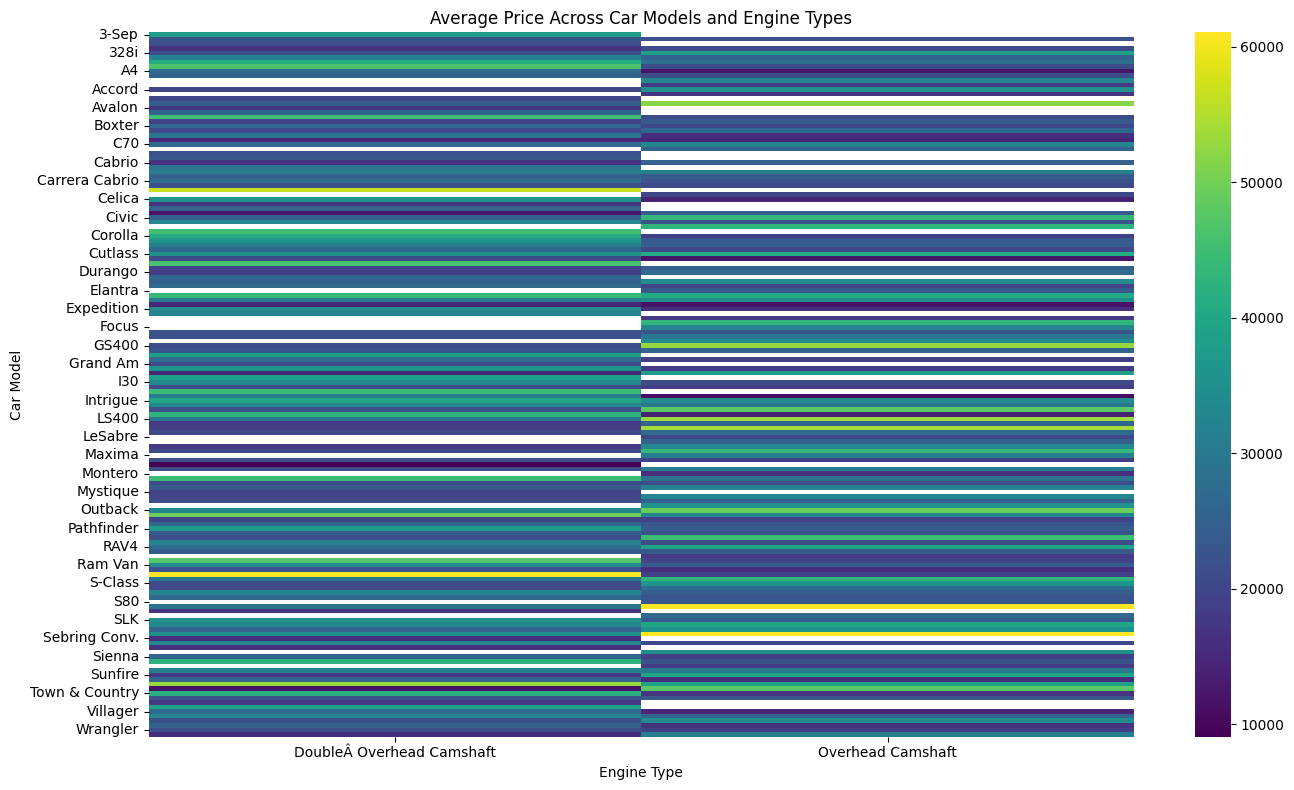

In [109]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot_price, cmap="viridis", annot=False)
plt.title("Average Price Across Car Models and Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()

Amazon Sales Data

In [110]:
df = pd.read_csv("amazon.csv")

In [111]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [113]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

1) What is the average rating for each product category?

In [114]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

avg_rating_by_category = (
    df.groupby("category")["rating"]
      .mean()
      .sort_values(ascending=False)
)

print(avg_rating_by_category)

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

2) What are the top rating_count products by category?

In [115]:
top_products = (
    df.sort_values("rating_count", ascending=False)
      .groupby("category")
      .head(1)        # top product per category
      .loc[:, ["category", "product_name", "rating_count"]]
)

print(top_products)

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

In [116]:
top5_by_category = (
    df.sort_values("rating_count", ascending=False)
      .groupby("category")
      .head(5)
      .loc[:, ["category", "product_name", "rating_count"]]
)

print(top5_by_category)

                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1172  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1191  Home&Kitchen|Kitchen&HomeAppliances|SewingMach...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   
1104  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

3)What is the distribution of discounted prices vs. actual prices?

In [117]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [118]:
df["discounted_price"] = (
    df["discounted_price"]
      .str.replace("₹", "", regex=False)
      .str.replace(",", "", regex=False)
      .astype(float)
)

df["actual_price"] = (
    df["actual_price"]
      .str.replace("₹", "", regex=False)
      .str.replace(",", "", regex=False)
      .astype(float)
)

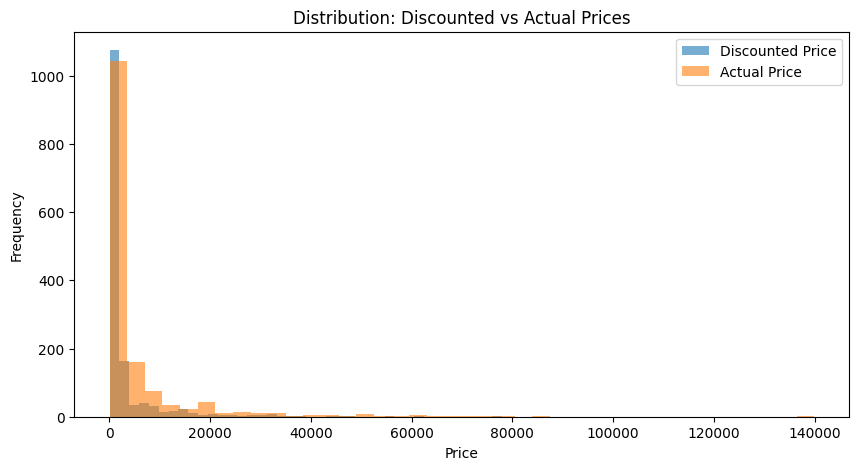

In [119]:
plt.figure(figsize=(10,5))
plt.hist(df["discounted_price"], bins=40, alpha=0.6, label="Discounted Price")
plt.hist(df["actual_price"], bins=40, alpha=0.6, label="Actual Price")
plt.legend()
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution: Discounted vs Actual Prices")
plt.show()

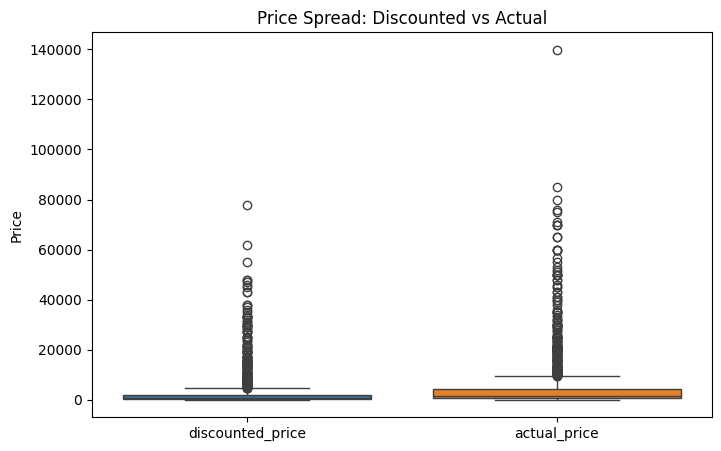

In [120]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["discounted_price", "actual_price"]])
plt.title("Price Spread: Discounted vs Actual")
plt.ylabel("Price")
plt.show()

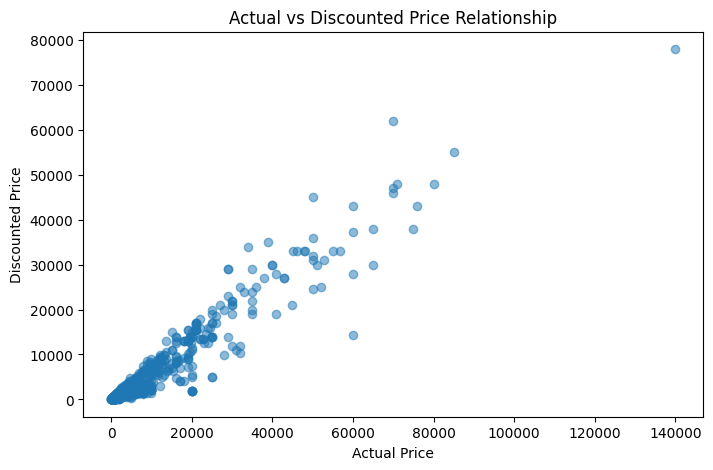

In [121]:
plt.figure(figsize=(8,5))
plt.scatter(df["actual_price"], df["discounted_price"], alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.title("Actual vs Discounted Price Relationship")
plt.show()

In [122]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

4)How does the average discount percentage vary across categories?

In [123]:
df["discount_pct"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100

In [124]:
avg_discount_by_cat = df.groupby("category")["discount_pct"].mean().reset_index()

In [125]:
print(avg_discount_by_cat)

                                              category  discount_pct
0    Car&Motorbike|CarAccessories|InteriorAccessori...     41.525000
1    Computers&Accessories|Accessories&Peripherals|...     78.387733
2    Computers&Accessories|Accessories&Peripherals|...     35.035035
3    Computers&Accessories|Accessories&Peripherals|...     56.335120
4    Computers&Accessories|Accessories&Peripherals|...     46.719582
..                                                 ...           ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...      0.000000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...      5.000000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...     17.619048
209  OfficeProducts|OfficePaperProducts|Paper|Stati...     13.074074
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...      0.000000

[211 rows x 2 columns]


In [126]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_pct'],
      dtype='object')

5) What are the most popular product names?

In [127]:
product_popularity = df.groupby("product_name")["review_id"].count().sort_values(ascending=False)

print(product_popularity.head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                      4
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating    3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                       3
Fire-Boltt Visionary 1.78" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring         3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Ba

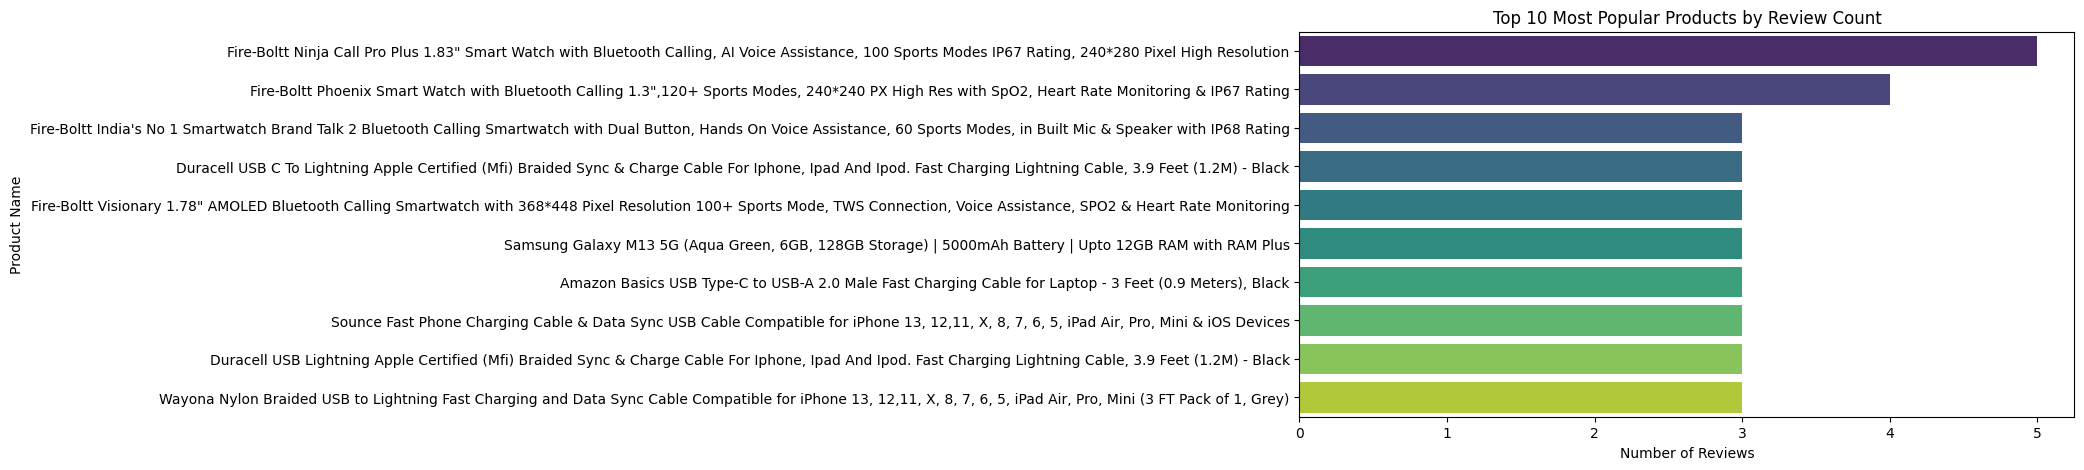

In [128]:
top_products = product_popularity.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Most Popular Products by Review Count")
plt.show()

6)What are the most popular product keywords?

In [129]:
from collections import Counter
import re


all_product_names = " ".join(df["product_name"].str.lower())

words = re.findall(r'\b[a-z]+\b', all_product_names)

word_counts = Counter(words)

top_keywords = word_counts.most_common(20)
print(top_keywords)

[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('and', 331), ('c', 289), ('charging', 247), ('type', 243), ('to', 219), ('fast', 212), ('in', 178), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('data', 136), ('hd', 135), ('led', 129), ('pro', 125)]


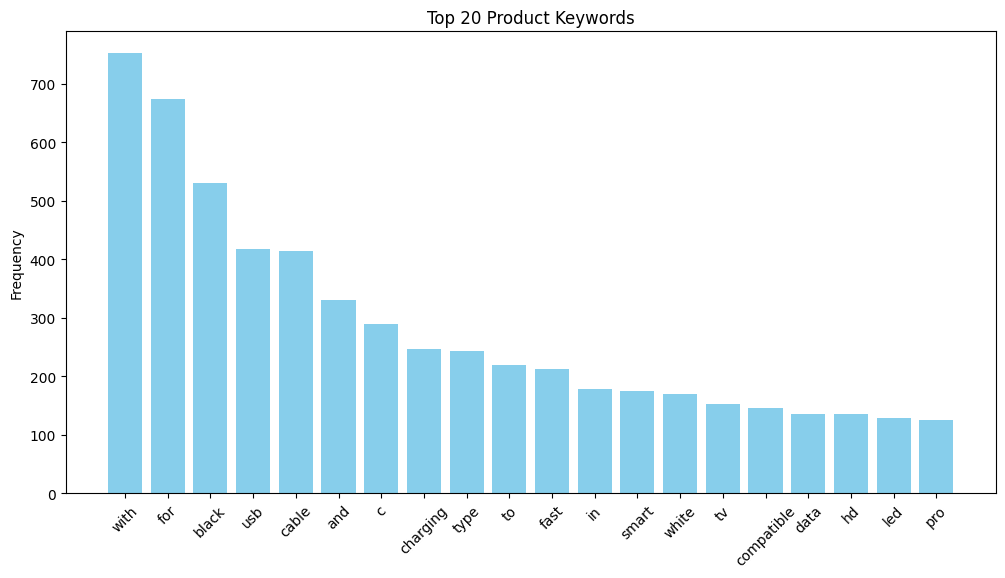

In [130]:
keywords, counts = zip(*top_keywords)
plt.figure(figsize=(12,6))
plt.bar(keywords, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Product Keywords")
plt.ylabel("Frequency")
plt.show()

In [131]:
all_text = " ".join(df["product_name"].str.lower() + " " + df["about_product"].str.lower())
words = re.findall(r'\b[a-z]+\b', all_text)
word_counts = Counter(words)
top_keywords = word_counts.most_common(20)
print(top_keywords)

[('and', 5620), ('the', 4572), ('to', 4065), ('with', 3895), ('for', 3260), ('of', 2207), ('a', 2063), ('your', 1882), ('in', 1800), ('usb', 1647), ('is', 1484), ('you', 1356), ('cable', 1333), ('it', 1173), ('on', 1080), ('or', 986), ('c', 954), ('can', 921), ('charging', 909), ('this', 894)]


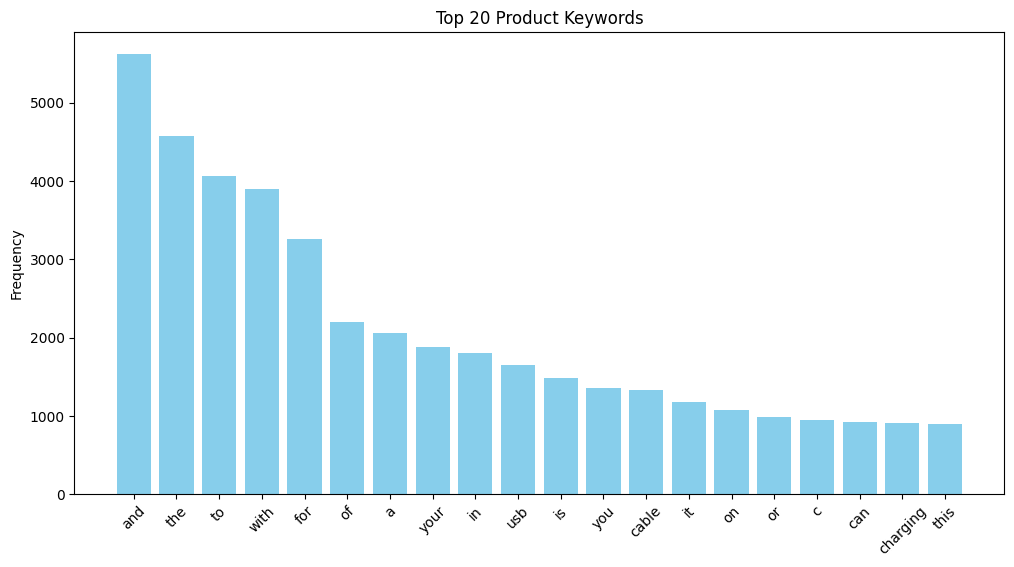

In [132]:
keywords, counts = zip(*top_keywords)
plt.figure(figsize=(12,6))
plt.bar(keywords, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Product Keywords")
plt.ylabel("Frequency")
plt.show()

In [135]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_pct'],
      dtype='object')

In [136]:
df["discounted_price"]

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

8) What is the correlation between discounted_price and rating?

In [138]:
df["discounted_price_clean"] = (
    df["discounted_price"].astype(float)
)

In [139]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

In [140]:
correlation = df["discounted_price_clean"].corr(df["rating"])
print("Correlation between discounted price and rating:", correlation)

Correlation between discounted price and rating: 0.12033741712288534


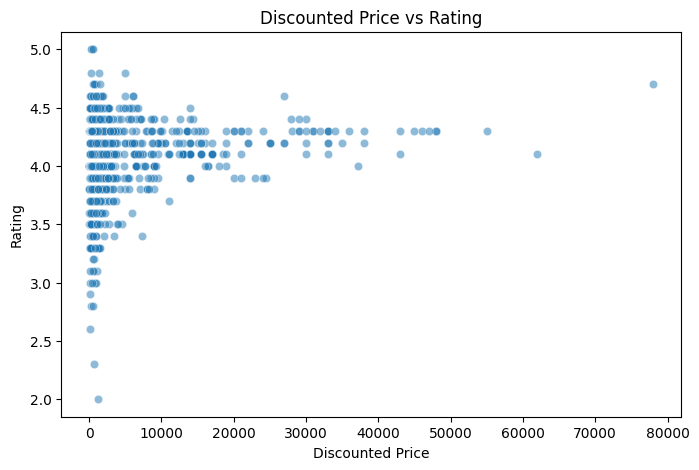

In [141]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="discounted_price_clean", y="rating", data=df, alpha=0.5)
plt.title("Discounted Price vs Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.show()

9)What are the Top 5 categories based on the highest ratings?

In [142]:
avg_rating_by_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)

In [143]:
top5_categories = avg_rating_by_category.head(5)
print(top5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


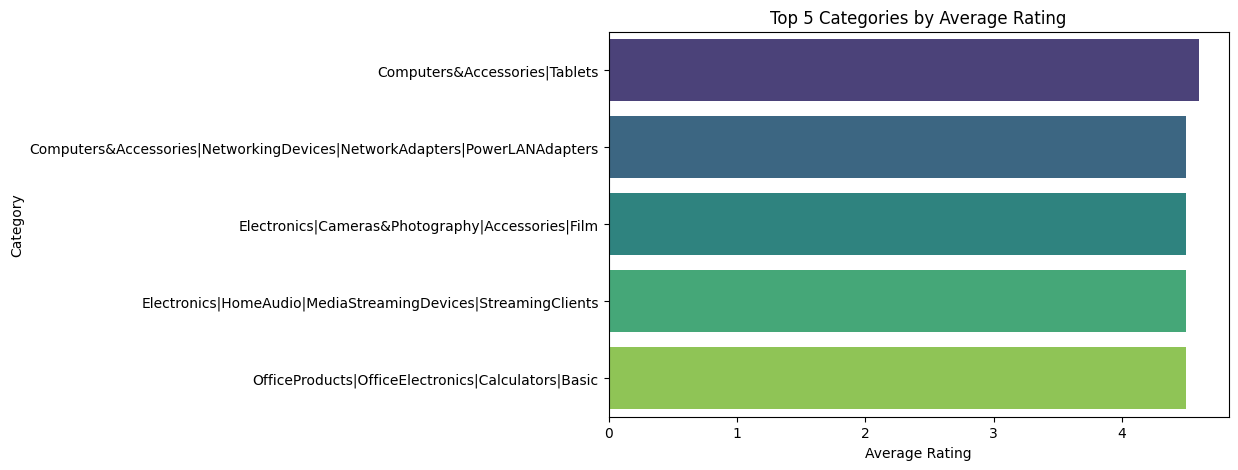

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(x=top5_categories.values, y=top5_categories.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Top 5 Categories by Average Rating")
plt.show()

10) Identify any potential areas for improvement or optimization based on the data analysis.

- Pricing Strategy: Align discounted prices with rating and demand; monitor high-variance SKUs for better margin management.

- Category Focus: Promote top-rated, high-engagement categories; improve low-rated or low-engagement categories.

- Inventory & Marketing: Prioritize popular products and high-demand SKUs for stock and campaigns.

- Product Descriptions & Keywords: Optimize listings using top keywords to boost discoverability and conversion.

- Customer Segmentation: Tailor promotions based on rating trends, price sensitivity, and category performance.

This ensures better sales, higher satisfaction, and optimized resource allocation.

Spotify Data

In [149]:
df = pd.read_csv("spotify.csv")

In [150]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [151]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [154]:
df.shape

(440, 5)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [153]:
df.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

1)Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

In [155]:
null_summary = df.isnull().sum()
print(null_summary)

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [156]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 27


In [159]:
df = df.drop_duplicates()

In [160]:
df = df.drop_duplicates()

In [161]:
print(df.shape)

(413, 5)


2)What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

In [162]:
print(df["Popularity"].describe())

count    413.000000
mean      75.384988
std        9.789010
min       29.000000
25%       70.000000
50%       76.000000
75%       82.000000
max       97.000000
Name: Popularity, dtype: float64


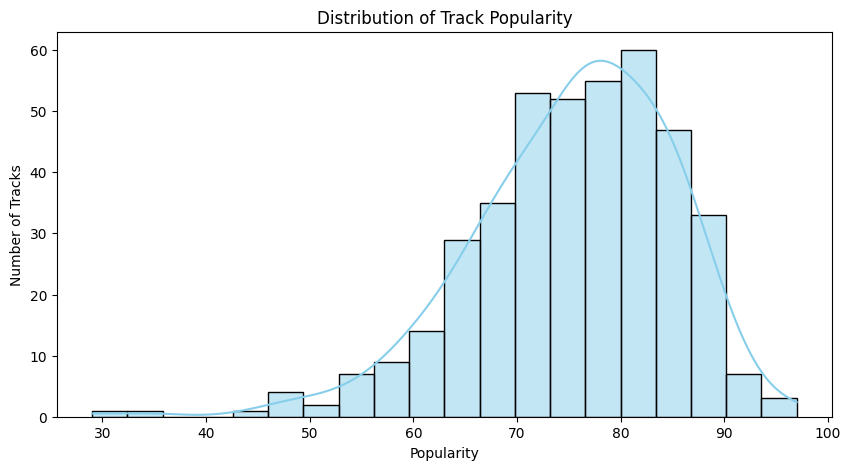

In [163]:
plt.figure(figsize=(10,5))
sns.histplot(df["Popularity"], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.show()

3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [164]:
df[["Popularity", "Duration (ms)"]].describe()

,Popularity,Duration (ms)
count,413.000000,413.000000
mean,75.384988,206358.496368
std,9.789010,53980.643666
min,29.000000,81666.000000
25%,70.000000,172185.000000
50%,76.000000,201480.000000
75%,82.000000,235093.000000
max,97.000000,501648.000000


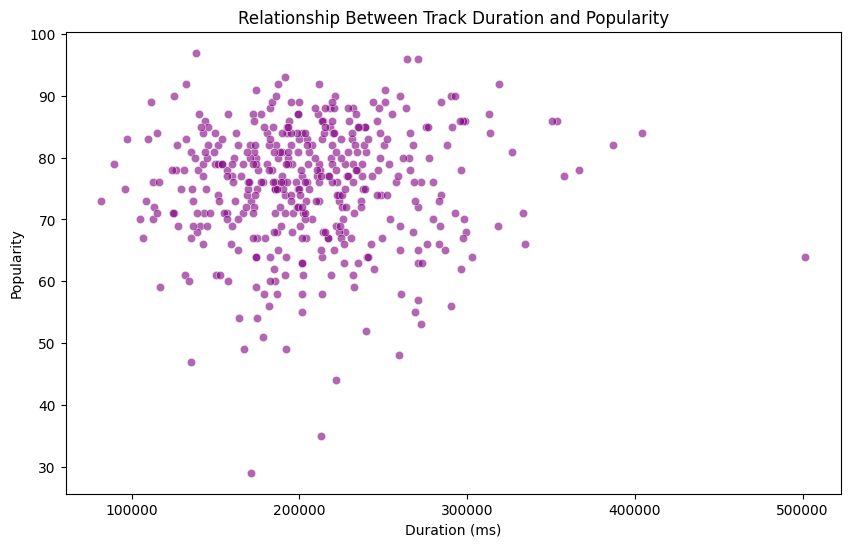

In [165]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Duration (ms)", y="Popularity", data=df, alpha=0.6, color='purple')
plt.title("Relationship Between Track Duration and Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

In [166]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [167]:
track_counts = df["Artist"].value_counts()

In [168]:
track_counts

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

In [175]:
top_artists = df["Artist"].value_counts().head(8)

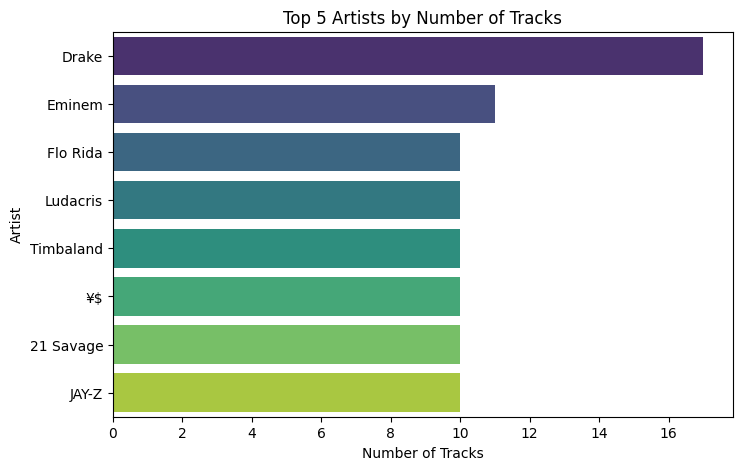

In [176]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title("Top 5 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

5)What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [177]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [178]:
least_popular_tracks = df.sort_values("Popularity", ascending=True)

In [179]:
top5_least_popular = least_popular_tracks.head(5)[["Artist", "Track Name", "Popularity"]]

In [180]:
top5_least_popular

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [181]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [182]:
top5_artists = df["Artist"].value_counts().head(5).index

In [183]:
top5_df = df[df["Artist"].isin(top5_artists)]

In [184]:
avg_popularity = top5_df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)
avg_popularity

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

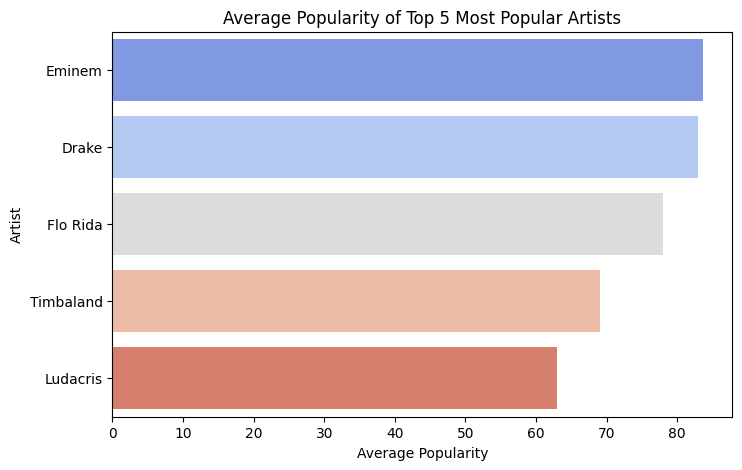

In [185]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_popularity.values, y=avg_popularity.index, palette="coolwarm")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
plt.title("Average Popularity of Top 5 Most Popular Artists")
plt.show()

7)For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [186]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [187]:
top5_artists = df["Artist"].value_counts().head(5).index
top5_df = df[df["Artist"].isin(top5_artists)]

In [188]:
most_popular_tracks = top5_df.loc[top5_df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name", "Popularity"]]
most_popular_tracks

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


8)Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [189]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [190]:
numeric_cols = ["Popularity", "Duration (ms)"]

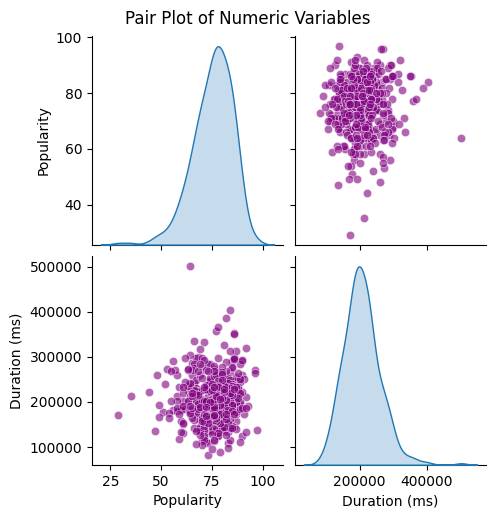

In [191]:
sns.pairplot(df[numeric_cols], kind="scatter", diag_kind="kde", plot_kws={"alpha":0.6, "color":"purple"})
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()

9)Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

In [194]:
top_artists = df["Artist"].value_counts().head(5).index
top_df = df[df["Artist"].isin(top_artists)]

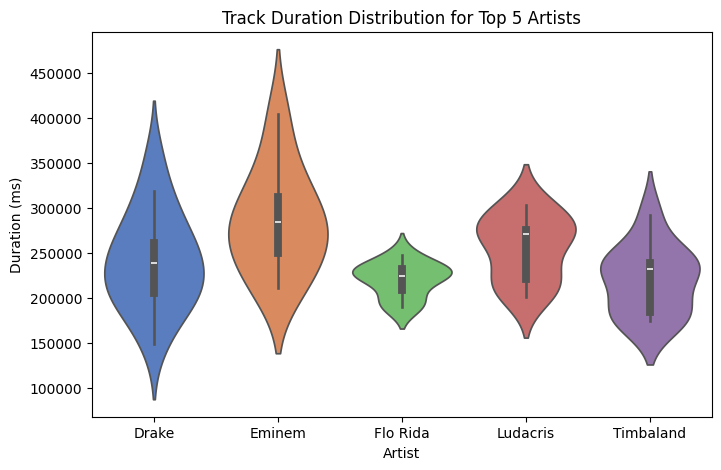

In [195]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Artist", y="Duration (ms)", data=top_df, palette="muted")
plt.title("Track Duration Distribution for Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

10)How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [196]:
top_artists = df["Artist"].value_counts().head(5).index
top_df = df[df["Artist"].isin(top_artists)]

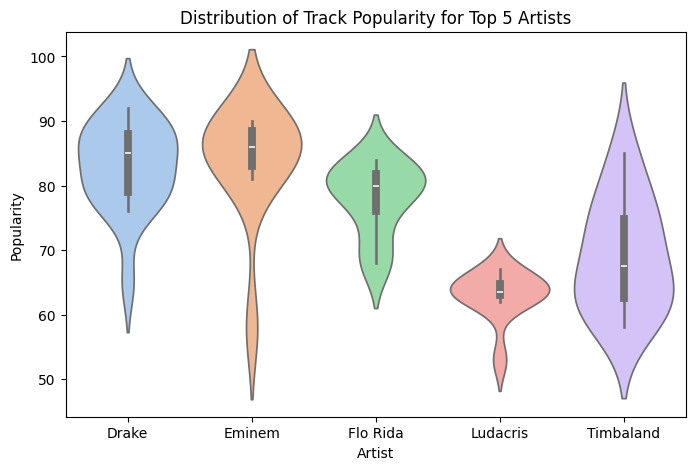

In [197]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Artist", y="Popularity", data=top_df, palette="pastel")
plt.title("Distribution of Track Popularity for Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()

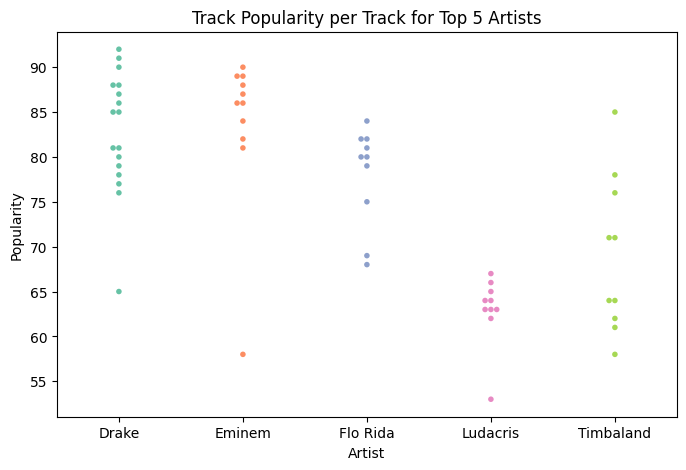

In [198]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="Artist", y="Popularity", data=top_df, palette="Set2", size=4)
plt.title("Track Popularity per Track for Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()